## Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from histogram import histogram 

In [3]:
df = pd.read_csv('cars_sales.csv')

## Exploratory Data Analysis

### Data Visualisation

In [4]:
df.head()

,model,year,price,transmission,mileage,fuelType,engineSize,manufacturer
0,GT86,2016,16000,Manual,24089,Petrol,2.0,Toyota
1,GT86,2017,15995,Manual,18615,Petrol,2.0,Toyota
2,GT86,2015,13998,Manual,27469,Petrol,2.0,Toyota
3,GT86,2017,18998,Manual,14736,Petrol,2.0,Toyota
4,GT86,2017,17498,Manual,36284,Petrol,2.0,Toyota


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108540 entries, 0 to 108539
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108540 non-null  object 
 1   year          108540 non-null  int64  
 2   price         108540 non-null  int64  
 3   transmission  108540 non-null  object 
 4   mileage       108540 non-null  int64  
 5   fuelType      108540 non-null  object 
 6   engineSize    108540 non-null  float64
 7   manufacturer  108540 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 6.6+ MB


In [6]:
catcols=[col for col in df.columns if df[col].dtype=="O"]
catcols

['model', 'transmission', 'fuelType', 'manufacturer']

### Price

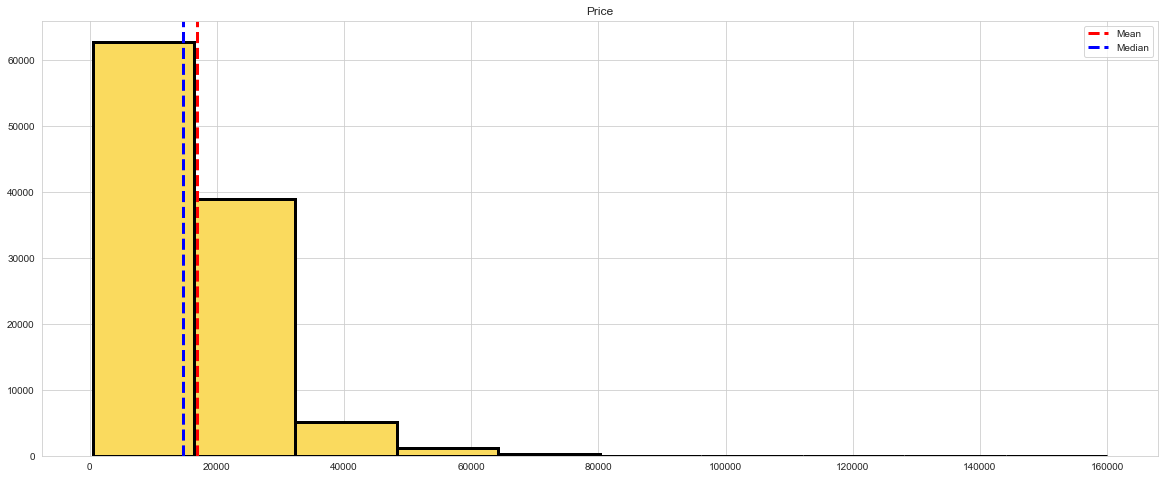

In [7]:
_ = histogram(df.price,"Price")

In [8]:
def PiePlot(feature):
    serie = df[feature].value_counts()
    fig = plt.subplots(1,1,figsize = (22,8))
    serie.plot(kind = 'pie',colors = ['#fdfd96','#fdcae1',
                                      '#84b6f4','#b0c2f2',
                                      '#ff6961','#77dd77'],
               autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*serie.sum()))
    
    plt.ylabel(None)

### Percentage of Vehicle Manufacturers

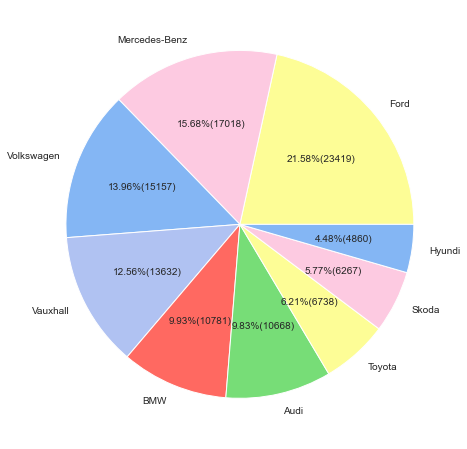

In [9]:
_ = PiePlot('manufacturer')

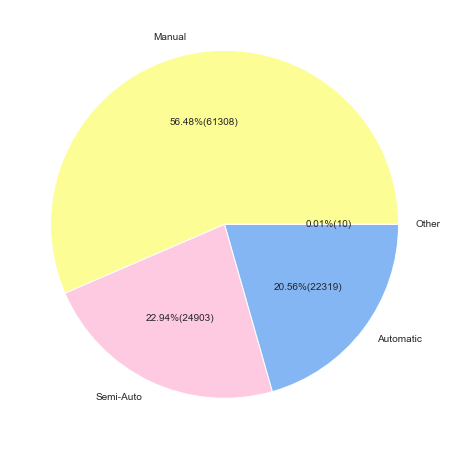

In [29]:
_ = PiePlot('transmission')

In [30]:
df.mileage.agg(['min','max'])

min         1
max    323000
Name: mileage, dtype: int64

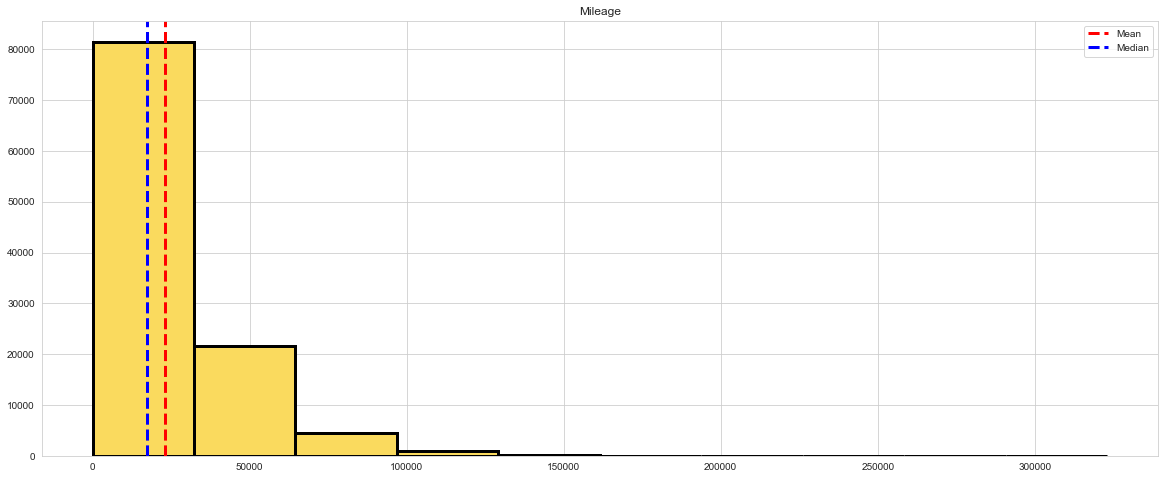

In [31]:
_ = histogram(df.mileage,'Mileage')

In [32]:
from intervals import IntervalFit

In [33]:
df.drop_duplicates(inplace=True)

In [34]:
IntervalFit(df.price).Lower_Interval()

Interval range STD 1.5: 1977.0
Interval range STD 2: -2954.0
Interval range STD 2.5: -7885.0
Interval range STD 3.0: -12817.0
Interval range STD 3.5: -17748.0
Interval range STD 4: -22679.0


In [35]:
df = df.query("price > 2000")

In [36]:
df.price.agg(["min","max"])

min      2050
max    159999
Name: price, dtype: int64

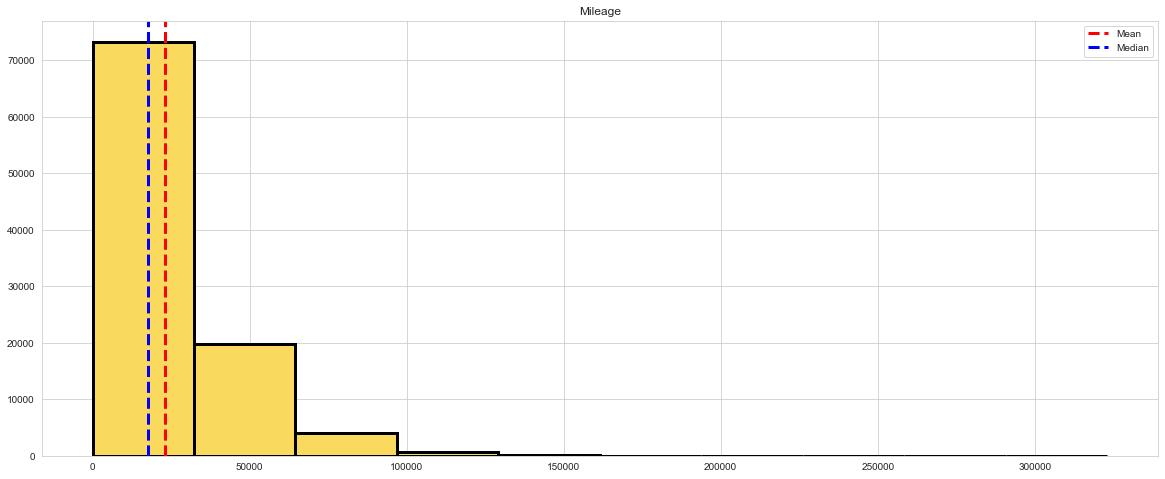

In [37]:
_ = histogram(df.mileage,"Mileage")

In [38]:
IntervalFit(df.mileage).Upper_Interval()

Interval range STD 1.5: 54128.0
Interval range STD 2: 64479.0
Interval range STD 2.5: 74830.0
Interval range STD 3.0: 85181.0
Interval range STD 3.5: 95532.0
Interval range STD 4: 105883.0


In [39]:
df = df.query("mileage > 3000 and mileage < 100000")

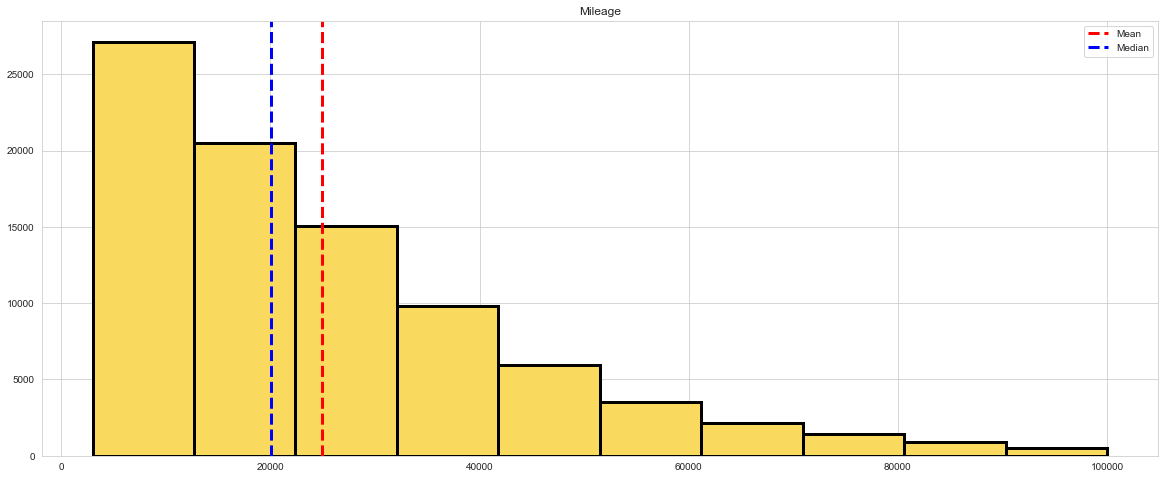

In [40]:
_ = histogram(df.mileage,"Mileage")

In [41]:
df.year.agg(["min","max"])

min    1970
max    2060
Name: year, dtype: int64

In [42]:
df = df.query("year >= 2000 and year <= 2020")

In [43]:
df.year.agg(["min","max"])

min    2000
max    2020
Name: year, dtype: int64

In [44]:
model_counts = df.model.value_counts()
model_counts = model_counts[model_counts < 10]

In [45]:
model_counts

 SQ7                8
 IQ                 8
 M6                 8
 S4                 8
 Caddy              6
 PROACE VERSO       6
 Eos                6
 Caddy Maxi         4
 Caddy Life         4
 Urban Cruiser      4
 S8                 4
 Cascada            4
 Kadjar             3
 Verso-S            3
 CLC Class          3
 S5                 3
 Ampera             3
 Veloster           3
 GLB Class          3
 Supra              2
 Tigra              2
 Z3                 2
 R Class            2
 Getz               2
 CLK                2
180                 1
 Ranger             1
 Transit Tourneo    1
230                 1
 Terracan           1
220                 1
 RS7                1
200                 1
1 Series            1
X5                  1
 Fox                1
Name: model, dtype: int64

In [46]:
df['model'] = df['model'].apply(lambda x: 'Other' if x in model_counts else x)

In [47]:
df.query("model == 'Other'").head()

,model,year,price,transmission,mileage,fuelType,engineSize,manufacturer
6640,Other,2019,28456,Automatic,9119,Diesel,2.0,Toyota
6641,Other,2019,24990,Manual,7350,Diesel,2.0,Toyota
6642,Other,2019,27990,Automatic,5633,Diesel,2.0,Toyota
6643,Other,2019,27249,Automatic,10524,Diesel,2.0,Toyota
6644,Other,2019,24450,Manual,9441,Diesel,2.0,Toyota


In [48]:
df.transmission.unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [49]:
df.fuelType.unique()

array(['Petrol', 'Other', 'Hybrid', 'Diesel', 'Electric'], dtype=object)

In [50]:
df = df.query("model != 'Other' and transmission != 'Other' and fuelType != 'Other'")

In [51]:
df.transmission.unique()

array(['Manual', 'Automatic', 'Semi-Auto'], dtype=object)

In [52]:
df.fuelType.unique()

array(['Petrol', 'Hybrid', 'Diesel', 'Electric'], dtype=object)

In [53]:
df.to_csv('cars_sales2.csv',index = False)

In [54]:
df= pd.read_csv('cars_sales2.csv')

In [55]:
model_counts = df.model.value_counts()
model_counts = model_counts[model_counts < 10]

In [56]:
model_counts

A3    1
Name: model, dtype: int64

In [57]:
df['model'] = df['model'].apply(lambda x: 'Other' if x in model_counts else x)

In [58]:
df.query("model == 'Other'").head()

,model,year,price,transmission,mileage,fuelType,engineSize,manufacturer
41524,Other,2018,22900,Semi-Auto,18972,Petrol,2.0,Audi


In [59]:
df = df.query("model != 'Other'")

In [60]:
df.query("model == 'Other'")

,model,year,price,transmission,mileage,fuelType,engineSize,manufacturer


In [61]:
enginesize_counts = df.engineSize.value_counts()
enginesize_counts = enginesize_counts[enginesize_counts < 10]

In [62]:
enginesize_counts

1.9    7
2.7    3
5.4    3
4.1    2
6.6    2
6.3    1
4.5    1
6.0    1
3.7    1
2.6    1
Name: engineSize, dtype: int64

In [63]:
df['engineSize'] = df['engineSize'].apply(lambda x: 'Other' if x in enginesize_counts else x)

In [64]:
df['engineSize'].unique()

array([2.0, 1.8, 1.2, 1.4, 1.6, 2.5, 2.2, 1.5, 1.0, 1.3, 0.0, 2.4, 3.0,
       2.8, 'Other', 1.1, 2.3, 5.0, 1.7, 3.2, 4.0, 4.2, 2.9, 5.2, 4.4,
       3.5, 2.1, 5.5, 4.7, 6.2], dtype=object)

In [65]:
df = df.query("engineSize != 'Other'")

In [66]:
df['engineSize'].unique()

array([2.0, 1.8, 1.2, 1.4, 1.6, 2.5, 2.2, 1.5, 1.0, 1.3, 0.0, 2.4, 3.0,
       2.8, 1.1, 2.3, 5.0, 1.7, 3.2, 4.0, 4.2, 2.9, 5.2, 4.4, 3.5, 2.1,
       5.5, 4.7, 6.2], dtype=object)

In [67]:
df['engineSize'] = df['engineSize'].astype(float)

In [68]:
df.engineSize.unique()

array([2. , 1.8, 1.2, 1.4, 1.6, 2.5, 2.2, 1.5, 1. , 1.3, 0. , 2.4, 3. ,
       2.8, 1.1, 2.3, 5. , 1.7, 3.2, 4. , 4.2, 2.9, 5.2, 4.4, 3.5, 2.1,
       5.5, 4.7, 6.2])

In [69]:
df.to_csv('cars_sales_clear.csv',index = False)

In [70]:
import string

In [71]:
df = pd.read_csv("cars_sales_clear.csv")

In [72]:
df.shape

(86482, 8)

In [73]:
def OHE():
    
    manufacturer_ohe = pd.get_dummies(df.manufacturer)
    model_ohe = pd.get_dummies(df.model)
    transmission_ohe = pd.get_dummies(df.transmission)
    fuelType_ohe = pd.get_dummies(df.fuelType)
    
    
    return manufacturer_ohe,model_ohe,transmission_ohe,fuelType_ohe

In [74]:
def concatene_df():
    
    manufacturer_ohe,model_ohe,transmission_ohe,fuelType_ohe = OHE()
    
    new_df = pd.concat([manufacturer_ohe,model_ohe,transmission_ohe,df.year,
                        fuelType_ohe,df.engineSize,
                        df.mileage,df.price],axis = 'columns')
    return new_df

In [75]:
df_ohe = concatene_df()

In [76]:
columns = df_ohe.columns

In [77]:
columns

Index(['Audi', 'BMW', 'Ford', 'Hyundi', 'Mercedes-Benz', 'Skoda', 'Toyota',
       'Vauxhall', 'Volkswagen', ' 1 Series',
       ...
       'Manual', 'Semi-Auto', 'year', 'Diesel', 'Electric', 'Hybrid', 'Petrol',
       'engineSize', 'mileage', 'price'],
      dtype='object', length=176)

In [78]:
 remove_spaces_columns = [column.strip(' ') for column in columns]

In [79]:
remove_spaces_columns

['Audi',
 'BMW',
 'Ford',
 'Hyundi',
 'Mercedes-Benz',
 'Skoda',
 'Toyota',
 'Vauxhall',
 'Volkswagen',
 '1 Series',
 '2 Series',
 '3 Series',
 '4 Series',
 '5 Series',
 '6 Series',
 '7 Series',
 '8 Series',
 'A Class',
 'A1',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'Adam',
 'Agila',
 'Amarok',
 'Antara',
 'Arteon',
 'Astra',
 'Auris',
 'Avensis',
 'Aygo',
 'B Class',
 'B-MAX',
 'Beetle',
 'C Class',
 'C-HR',
 'C-MAX',
 'CC',
 'CL Class',
 'CLA Class',
 'CLS Class',
 'Caddy Maxi Life',
 'California',
 'Camry',
 'Caravelle',
 'Citigo',
 'Combo Life',
 'Corolla',
 'Corsa',
 'Crossland X',
 'E Class',
 'EcoSport',
 'Edge',
 'Fabia',
 'Fiesta',
 'Focus',
 'Fusion',
 'G Class',
 'GL Class',
 'GLA Class',
 'GLC Class',
 'GLE Class',
 'GLS Class',
 'GT86',
 'GTC',
 'Galaxy',
 'Golf',
 'Golf SV',
 'Grand C-MAX',
 'Grand Tourneo Connect',
 'Grandland X',
 'Hilux',
 'I10',
 'I20',
 'I30',
 'I40',
 'I800',
 'IX20',
 'IX35',
 'Insignia',
 'Ioniq',
 'Jetta',
 'KA',
 'Ka+',
 'Kamiq',
 'Karoq',
 '

In [80]:
df_ohe.columns = remove_spaces_columns

In [81]:
df_ohe.columns[:10]

Index(['Audi', 'BMW', 'Ford', 'Hyundi', 'Mercedes-Benz', 'Skoda', 'Toyota',
       'Vauxhall', 'Volkswagen', '1 Series'],
      dtype='object')

In [82]:
df_ohe.to_csv("cars_sales_ohe.csv",index = False)